In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
from IPython.display import display, HTML

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
with open('./result.json') as datafile:
  data = json.load(datafile)

dataframe = pd.DataFrame(data).sort_values('size')

In [3]:
display(dataframe)

,name,ops,margin,percentSlower,size
0,array methods,6024.0,16.79,12.03,100
1,for loop,6848.0,13.25,0.00,100
2,generators,5227.0,14.83,23.67,100
3,iterators,5887.0,13.42,14.03,100
444,array methods,3080.0,15.57,5.23,200
...,...,...,...,...,...
3231,iterators,5.5,17.02,9.69,82600
3232,array methods,7.0,12.96,0.00,82700
3233,for loop,6.1,14.96,12.86,82700
3234,generators,5.0,19.62,28.57,82700


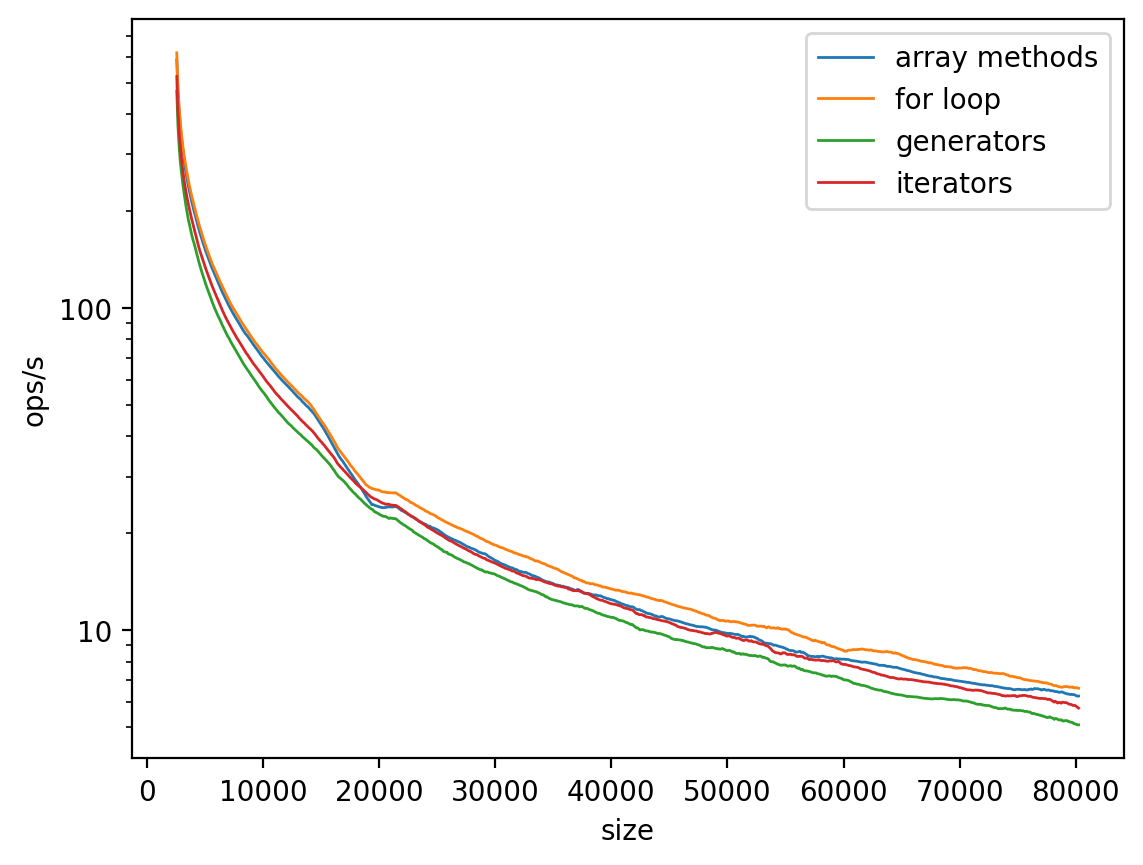

In [10]:
groups = dataframe.groupby('name')

ax = plt.gca()
ax.set_yscale('log')
ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
ax.set_ylabel('ops/s')
names = dataframe['name'].unique()

for name in names:
    data = groups.get_group(name)[['size', 'ops']].rolling(50).mean()
    data.plot(kind='line',x='size',y='ops' ,ax=ax, linewidth=1)

current_handles, _ = ax.get_legend_handles_labels()
plt.legend(current_handles, names)

plt.show()